In [1]:
# First we do a set of imports
import csv
from pprint import pprint
import cinnabar
from cinnabar import plotting as cinnabar_plotting
from cinnabar import femap, stats

In [3]:
# read in the experimental data

experimental_data = {}
experimental_filename = 'experimental_core4_Mpocket_exclude18to23.tsv'

with open(experimental_filename, 'r') as fd:
    rd = csv.reader(fd, delimiter="\t", quotechar='"')
    headers = next(rd)
    for row in rd:
        experimental_data[row[0]] = {}
        experimental_data[row[0]]['dG'] = float(row[1])
        experimental_data[row[0]]['ddG'] = float(row[2])

pprint(experimental_data)

{'lig_13': {'dG': -10.5, 'ddG': 0.0},
 'lig_27': {'dG': -10.02, 'ddG': 0.0},
 'lig_28': {'dG': -9.13, 'ddG': 0.0},
 'lig_29': {'dG': -9.56, 'ddG': 0.0},
 'lig_30': {'dG': -10.67, 'ddG': 0.0},
 'lig_31': {'dG': -9.55, 'ddG': 0.0},
 'lig_32': {'dG': -9.77, 'ddG': 0.0},
 'lig_33': {'dG': -10.75, 'ddG': 0.0},
 'lig_34': {'dG': -11.21, 'ddG': 0.0},
 'lig_35': {'dG': -10.42, 'ddG': 0.0},
 'lig_36': {'dG': -10.75, 'ddG': 0.0}}


In [4]:
# Read in calculated results

calculated_data = {}
calculated_filename = './final_results_core4_Mpocket_cycle_exclude18to23.tsv'

with open(calculated_filename, 'r') as fd:
    rd = csv.reader(fd, delimiter="\t", quotechar='"')
    headers = next(rd)
    for row in rd:
        tag = row[0] + "->" + row[1]
        calculated_data[tag] = {}
        calculated_data[tag]['ligand_i'] = row[0]
        calculated_data[tag]['ligand_j'] = row[1]
        calculated_data[tag]['dG'] = float(row[2])
        calculated_data[tag]['ddG'] = float(row[3])

pprint(calculated_data)

{'lig_13->lig_32': {'dG': 0.5800000000000006,
                    'ddG': 0.0199999999999995,
                    'ligand_i': 'lig_13',
                    'ligand_j': 'lig_32'},
 'lig_27->lig_13': {'dG': 0.2533333333333338,
                    'ddG': 0.7807901980259058,
                    'ligand_i': 'lig_27',
                    'ligand_j': 'lig_13'},
 'lig_28->lig_13': {'dG': 1.496666666666666,
                    'ddG': 0.6658328118479415,
                    'ligand_i': 'lig_28',
                    'ligand_j': 'lig_13'},
 'lig_28->lig_31': {'dG': 1.456666666666668,
                    'ddG': 0.825247437641181,
                    'ligand_i': 'lig_28',
                    'ligand_j': 'lig_31'},
 'lig_28->lig_36': {'dG': 2.5733333333333333,
                    'ddG': 1.073374740402127,
                    'ligand_i': 'lig_28',
                    'ligand_j': 'lig_36'},
 'lig_29->lig_27': {'dG': -2.0,
                    'ddG': 0.2193171219946131,
                    'ligand_i': 'li

In [5]:
cinnabar_filename = './cinnabar_input_core4_Mpocket_cycle_exclude18to23.csv'

with open(cinnabar_filename, 'w') as f:
    f.write("# Experimental block\n")
    f.write("# Ligand, expt_DDG, expt_dDDG\n")
    for entry in experimental_data:
        dG = experimental_data[entry]['dG']
        ddG = experimental_data[entry]['ddG']
        f.write(f"{entry},{dG:.2f},{ddG:.2f}\n")
    f.write('\n')
    f.write('# Calculated block\n')
    f.write('# Ligand1,Ligand2,calc_DDG,calc_dDDG(MBAR),calc_dDDG(additional)\n')
    for entry in calculated_data:
        dG = calculated_data[entry]['dG']
        ddG = calculated_data[entry]['ddG']
        molA = calculated_data[entry]['ligand_i']
        molB = calculated_data[entry]['ligand_j']
        f.write(f"{molA},{molB},{dG:.2f},0,{ddG:.2f}\n")

/home/hiroyuki/miniforge3/envs/openfe_env/lib/python3.12/site-packages/cinnabar/femap.py:35: UserWarning: Assuming kcal/mol units on measurements
  warnings.warn("Assuming kcal/mol units on measurements")


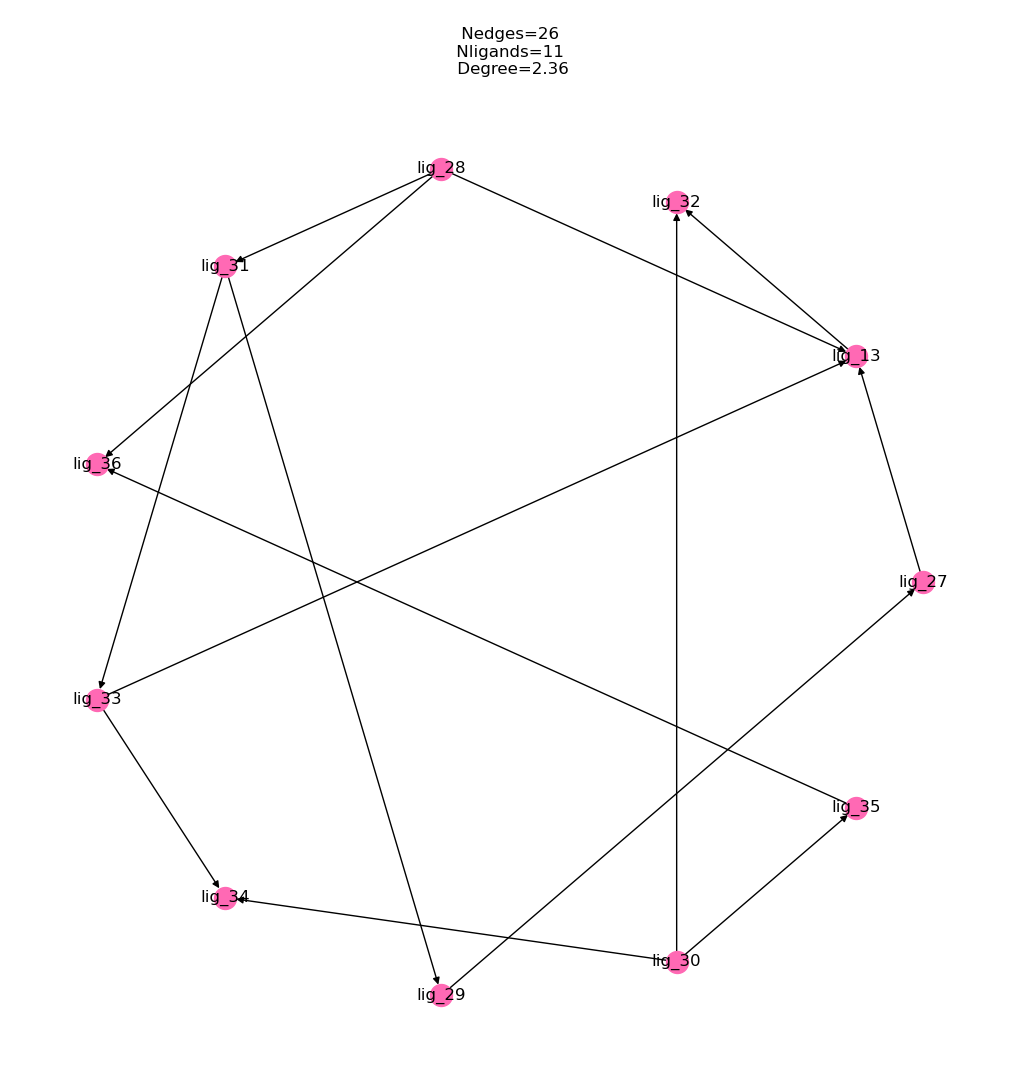

In [6]:
fe = femap.FEMap.from_csv('./cinnabar_input_core4_Mpocket_cycle_exclude18to23.csv')
fe.generate_absolute_values()  # Get MLE generated estimates of the absolute values
fe.draw_graph()

/home/hiroyuki/miniforge3/envs/openfe_env/lib/python3.12/site-packages/cinnabar/femap.py:35: UserWarning: Assuming kcal/mol units on measurements
  warnings.warn("Assuming kcal/mol units on measurements")


-10.211818181818181


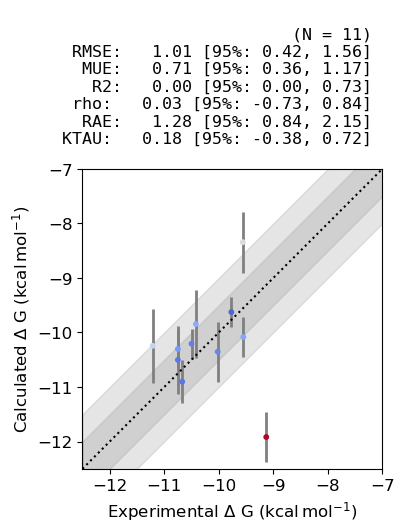

In [15]:
data = femap.read_csv('./cinnabar_input_core4_Mpocket_cycle_exclude18to23.csv')
exp_DG_sum = sum([data['Experimental'][i].DG for i in data['Experimental'].keys()])
shift = exp_DG_sum / len(data['Experimental'].keys())

cinnabar_plotting.plot_DGs(fe.to_legacy_graph(), figsize=5,  shift=shift.m, filename='./core4_Mpocket_cycle_exclude18to23.svg', xy_lim=[-12.5,-7])

In [13]:
# write out the calculated results
dG_results = {}
nodes = list(fe.to_legacy_graph().nodes.data())

for key in range(len(nodes)):
    dG_results[nodes[key][0]] = {
        'experimental_estimate': nodes[key][1]['exp_DG'],
        'experimental_error': nodes[key][1]['exp_dDG'],
        'calculated_estimate': round(nodes[key][1]['calc_DG'],2),
        'calculated_error': round(nodes[key][1]['calc_dDG'],2),
    }

with open('./dG_calc_exp_results_NES.dat', 'w') as f:
    writer = csv.writer(f, delimiter="\t", lineterminator="\n")
    writer.writerow(["ligand", "DG(MLE)", "uncertainty (kcal/mol)","DG"])
    for ligand in dG_results:
        writer.writerow([
            ligand,
            dG_results[ligand]['calculated_estimate']+shift.m,
            dG_results[ligand]['calculated_error'],
            dG_results[ligand]['experimental_estimate']
        ])
        print(dG_results[ligand])

{'experimental_estimate': -10.02, 'experimental_error': 0.0, 'calculated_estimate': -0.14, 'calculated_error': 0.55}
{'experimental_estimate': -10.5, 'experimental_error': 0.0, 'calculated_estimate': 0.0, 'calculated_error': 0.28}
{'experimental_estimate': -9.77, 'experimental_error': 0.0, 'calculated_estimate': 0.59, 'calculated_error': 0.28}
{'experimental_estimate': -9.13, 'experimental_error': 0.0, 'calculated_estimate': -1.71, 'calculated_error': 0.45}
{'experimental_estimate': -9.55, 'experimental_error': 0.0, 'calculated_estimate': 0.13, 'calculated_error': 0.36}
{'experimental_estimate': -10.75, 'experimental_error': 0.0, 'calculated_estimate': -0.29, 'calculated_error': 0.62}
{'experimental_estimate': -10.75, 'experimental_error': 0.0, 'calculated_estimate': -0.09, 'calculated_error': 0.35}
{'experimental_estimate': -11.21, 'experimental_error': 0.0, 'calculated_estimate': -0.03, 'calculated_error': 0.68}
{'experimental_estimate': -9.56, 'experimental_error': 0.0, 'calculated_

In [18]:
import numpy as np
import pandas as pd
from scipy.stats import linregress, pearsonr
from sklearn.metrics import mean_squared_error
import sklearn

# read data
file_path = 'dG_calc_exp_results_NES.dat'
df = pd.read_csv(file_path, delimiter='\t')

# exclude 'lig_28'
df_filtered = df[df['ligand'] != "lig_28"]

new_shift = sum(df_filtered['DG']) / len(df_filtered['DG'])
print(new_shift)

# define y_true_sample and y_pred_sample
y_true_sample = df_filtered['DG']
y_pred_sample = df_filtered['DG(MLE)'] + 10.21 + new_shift

#print(y_pred_sample)

# RMSE
rmse = np.sqrt(mean_squared_error(y_true_sample, y_pred_sample))
print(f"RMSE: {rmse}")

# R²
slope, intercept, r_value, p_value, std_err = linregress(y_true_sample, y_pred_sample)
r_squared = r_value**2
print(f"R²: {r_squared}")

# pearson
pearson_corr = pearsonr(y_true_sample, y_pred_sample)[0]
print(f"pearson: {pearson_corr}")

-10.32
RMSE: 0.5544707848387238
R²: 0.38968188402171466
pearson: 0.624245051259291
